In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [45]:
#df = pd.read_csv("D:/HDSE 24.1/ML/Course Work/employee-attrition-prediction-ml/Dataset/after_preprocessing.csv")
df = pd.read_csv("D:/employee-attrition-prediction-ml/Dataset/after_preprocessing.csv")
df.shape

(73915, 23)

In [46]:
target_categories = df['Attrition'].unique()

In [47]:
print("Categories in the target column : ")
for category in target_categories:
    print(category)

Categories in the target column : 
1
0


In [48]:
x = df.drop(columns = [ 'Attrition'])
y = df['Attrition']

In [49]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [50]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4665 2306]
 [2469 5343]]


In [52]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

print("True Positives (TP) :", TP)
print("True Negatives (TN) :",TN)
print("False Positive (FP) :",FP)
print("False Negatives (FN)  :",FN)

True Positives (TP) : 5343
True Negatives (TN) : 4665
False Positive (FP) : 2306
False Negatives (FN)  : 2469


In [53]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_measure = 2 *(precision * recall) / ( precision + recall)

print("Accuracy : ", accuracy)
print("Precision : ", precision)
print("Recall : ", recall)
print("f_measure : ", f_measure)

Accuracy :  0.6769938442805926
Precision :  0.6985226827036214
Recall :  0.6839477726574501
f_measure :  0.6911583985511933


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      6971
           1       0.70      0.68      0.69      7812

    accuracy                           0.68     14783
   macro avg       0.68      0.68      0.68     14783
weighted avg       0.68      0.68      0.68     14783



<h1>Search Best K Value</h1>

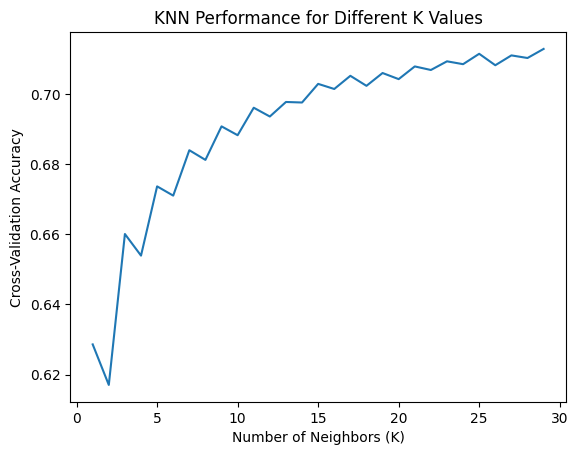

Best K: 29


In [55]:
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 30))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Performance for Different K Values')
plt.show()


best_k = k_values[np.argmax(cv_scores)]
print("Best K:", best_k)

<h1>Using Best K value </h1>

In [57]:
best_knn = KNeighborsClassifier(n_neighbors = 29)
best_knn.fit(x_train,y_train)

y_pred = best_knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

print("True Positives (TP) :", TP)
print("True Negatives (TN) :",TN)
print("False Positive (FP) :",FP)
print("False Negatives (FN)  :",FN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_measure = 2 *(precision * recall) / ( precision + recall)

print("Accuracy : ", accuracy)
print("Precision : ", precision)
print("Recall : ", recall)
print("f_measure : ", f_measure)

print(classification_report(y_test,y_pred))

[[4891 2080]
 [2163 5649]]
True Positives (TP) : 5649
True Negatives (TN) : 4891
False Positive (FP) : 2080
False Negatives (FN)  : 2163
Accuracy :  0.7129811269701685
Precision :  0.7308836848233924
Recall :  0.7231182795698925
f_measure :  0.7269802458014284
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      6971
           1       0.73      0.72      0.73      7812

    accuracy                           0.71     14783
   macro avg       0.71      0.71      0.71     14783
weighted avg       0.71      0.71      0.71     14783

